In [116]:
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [172]:
import seaborn as sns

In [118]:
df_total = pd.read_excel('total_partners.xlsx')
df_total = df_total[['Region', 'Location', 'Company', 'LinkedIn_profile', 'Result', 'Call']] 
df_total.head()

,Region,Location,Company,LinkedIn_profile,Result,Call
0,Asia pacific,Afganistan,Identity Infotech,https://www.linkedin.com/in/qrasouli,NaN,NaN
1,Asia pacific,Afganistan,Green Zone ICT Services,https://www.linkedin.com/in/mohammad-amin-nasa...,NaN,NaN
2,Asia pacific,Afganistan,Green Zone ICT Services,https://www.linkedin.com/in/sahebdad-azizi-884...,NaN,NaN
3,Asia pacific,Afganistan,Green Zone ICT Services,https://www.linkedin.com/in/obaid-aslami-418a0...,NaN,NaN
4,Asia pacific,Afganistan,YRMPT,https://www.linkedin.com/in/ahmad-tamim-malik-...,NaN,NaN


In [119]:
df_total.describe()

#Представленные данные - демонстрируют статистику по реакциям на первичные инвайты интересующих персон из компаний-потенциальных
#партнеров, по различным регионам, странам.

,Region,Location,Company,LinkedIn_profile,Result,Call
count,1810,1810,1810,1810,758,45
unique,5,77,767,1810,5,1
top,MEA,Pakistan,mce Systems,https://www.linkedin.com/in/ahmad-salman-othma...,*,да
freq,899,97,13,1,392,45


In [120]:
#расчет контактных регионов от заинтересовавшихся компаний
reg_df = df_total[['Region', 'Location', 'Company', 'Result', 'Call']] 
interested_regions = reg_df[((reg_df['Result'] == 'интересно')|(reg_df['Result'] == 'на перспективу')|(reg_df['Result'] == 'спорно'))].groupby('Region').Company.nunique() / reg_df.groupby('Region').Company.nunique() * 100
interested_regions.reset_index().rename(columns = {'Company': '%Interested'})


,Region,%Interested
0,Asia pacific,36.879433
1,CIS,28.571429
2,Europe,22.784810
3,MEA,39.512195
4,Southeast Asia,32.773109


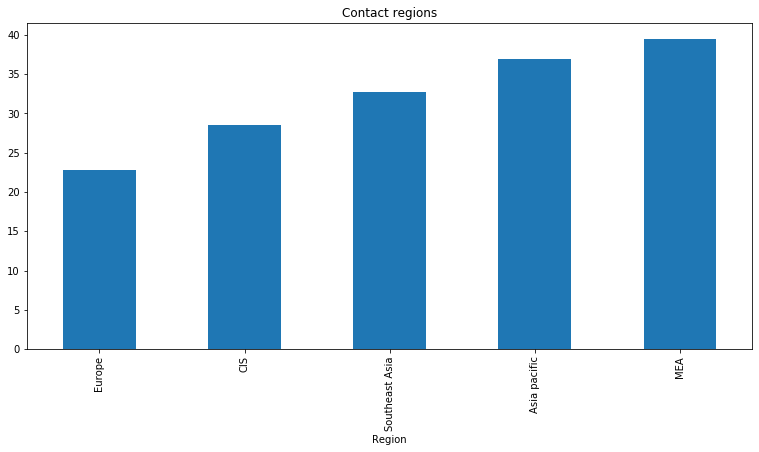

In [121]:
interested_regions.sort_values().plot(kind='bar', title='Contact regions')

In [122]:
#Гипотезы/выводы:
# Более контактны регионы с малоразвитыми странами, отсюда интерес к партнерству? Хотят зацепиться за деньги при любой возм-ти?
# Наименее контактна Европа, санкции / предвзятое отношение к РФ?
# Страны CIS не проявили интереса, не интересно партнерство т.к. сами ищут партнеров на тех же рынках? (т.к. компании рассматривались из одной и той же отрасли)

In [123]:
df = pd.read_excel('analytics.xlsx')
df.columns = ['purchase','name', 'price_contract', 'guarantee_bid', 'guarantee_contract', 'date', 'month', 'type', 'class', 'platform', 'region', 'customer', 'winner', 'winner_price']
df.head()

,purchase,name,price_contract,guarantee_bid,guarantee_contract,date,month,type,class,platform,region,customer,winner,winner_price
0,0162100019419000015,обслуживание зданий- уборка служебных помещений,429600.00,NaN,128880,2019-12-31 06:54:48.979,Декабрь,44-ФЗ,Электронный аукцион,Сбербанк-АСТ,66 Свердловская область,Межмуниципальный Отдел Министерства Внутренних...,ООО «Блеск Сервис»,300596.00
1,0162100013519000068,Оказание услуг по комплексной уборке служебных...,2108436.00,21084.36,"10,00 %",2019-12-30 16:07:05.163,Декабрь,44-ФЗ,Электронный аукцион,Сбербанк-АСТ,66 Свердловская область,Межмуниципальное Управление Министерства Внутр...,ООО «Экспресс Блеск»,1584882.66
2,31908742380,1008-2019-01601. Оказание услуг по комплексной...,49643216.19,496433.00,NaN,2019-12-30 14:43:31.000,Декабрь,223-ФЗ,Закупка иного способа размещения,ETPRF.RU,66 Свердловская область,АО «Производственное Объединение «Уральский Оп...,NaN,NaN
3,0162300025819000034,Оказание услуг по уборке помещений,492114.36,NaN,"5,00 %",2019-12-25 06:27:54.020,Декабрь,44-ФЗ,Электронный аукцион,Сбербанк-АСТ,66 Свердловская область,МКУ «Управление Образования Городского Округа ...,Андрияшкина Евгения Викторовна,166386.62
4,0362200064719000500,"Оказание услуг по уборке помещений ГБУЗ СО ""Кр...",934631.20,NaN,"10,00 %",2019-12-25 07:59:19.597,Декабрь,44-ФЗ,Электронный аукцион,Сбербанк-АСТ,66 Свердловская область,ГБУЗ Свердловской обл. «Красноуфимская Районна...,Каравашкин Андрей Александрович,619538.15


In [124]:
df.describe()
#Данные по контрактной системе закупок в Свердловской области в отрасли клининга за 2019й год

,price_contract,guarantee_bid,winner_price
count,3.420000e+02,9.600000e+01,1.630000e+02
mean,2.966148e+06,9.514950e+04,1.227347e+06
std,1.050282e+07,3.867258e+05,2.450462e+06
min,1.702435e+04,6.726600e+02,5.447830e+03
25%,3.480612e+05,9.533030e+03,1.639672e+05
50%,9.321670e+05,1.871346e+04,3.324988e+05
75%,3.000042e+06,4.888053e+04,1.013059e+06
max,1.804000e+08,3.608000e+06,2.199207e+07


In [132]:
month = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
df['month'] = pd.Categorical(df['month'], categories=month, ordered=True)
dynamics_by_month = df[['month', 'purchase']].groupby('month').count()
dynamics_by_month

,purchase
month,
Январь,24
Февраль,40
Март,31
Апрель,22
Май,19
Июнь,36
Июль,19
Август,24
Сентябрь,33


Text(0, 0.5, 'Количество')

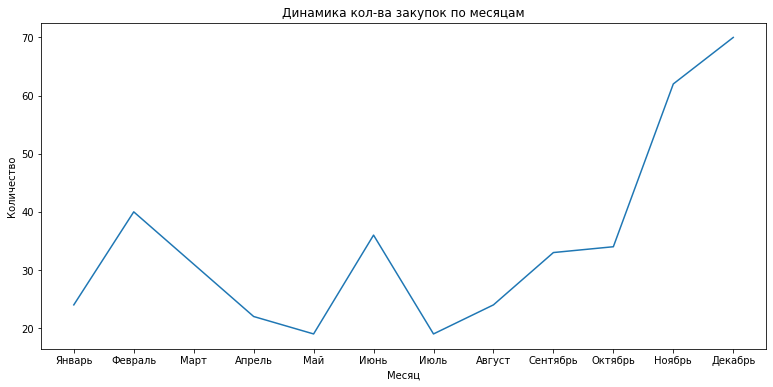

In [133]:
plt.plot(dynamics_by_month.index, dynamics_by_month.purchase)
plt.title('Динамика кол-ва закупок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')

In [ ]:
#Гипотезы/выводы:
# Отрасль сезонная?
# Большинство закупок в Ноябре-Декабре, вероятнее всего т.к. контракты заключаются преимущ-но на 12 мес?
# Весна-лето не сезонный период, не лучшее время чтобы "стартовать" в этом направлении контрактной системы, будет сложно забрать контракт

In [170]:
#Динамика закупок по месяцам в зависимости от типа
new = df.pivot_table(index='month', columns='type', values='purchase', aggfunc=len).fillna(0)

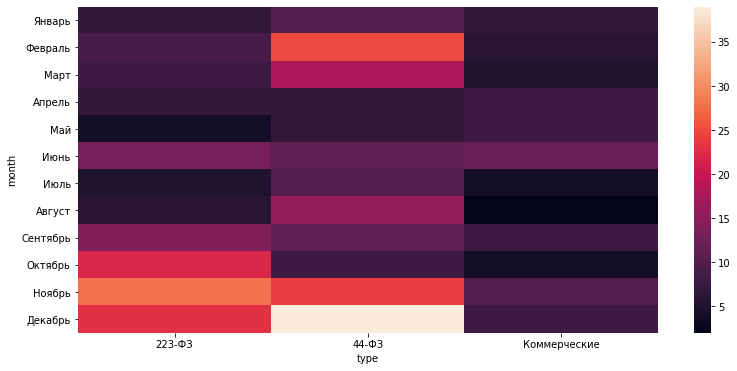

In [173]:
sns.heatmap(new)

In [ ]:
#Гипотезы/выводы:
# Абсолютное преимущество закупок 44ФЗ приходится на Декабрь, в целом больше закупок 44ФЗ от общего кол-ва
# 223 ФЗ сопоставим с сезоном 44ФЗ, сезон закупок 223 ФЗ начинается раньше - в Октябре
# Коммерческих закупок меньше всего, никак не связаны с сезонностью гос. ситемы

In [177]:
count_price = df[['type', 'month','price_contract', 'winner_price']]
count_price['mean_price'] = 100 - (count_price['winner_price'] * 100 / count_price['price_contract'])
count_price.dropna()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,month,price_contract,winner_price,mean_price
0,44-ФЗ,Декабрь,429600.00,300596.00,30.028864
1,44-ФЗ,Декабрь,2108436.00,1584882.66,24.831360
3,44-ФЗ,Декабрь,492114.36,166386.62,66.189440
4,44-ФЗ,Декабрь,934631.20,619538.15,33.713089
5,44-ФЗ,Декабрь,1431596.00,638842.00,55.375539
...,...,...,...,...,...
407,44-ФЗ,Январь,80000.00,69999.00,12.501250
408,44-ФЗ,Январь,70000.00,59999.00,14.287143
409,44-ФЗ,Январь,154686.66,101000.00,34.706716
412,223-ФЗ,Январь,6441152.28,4750000.00,26.255431


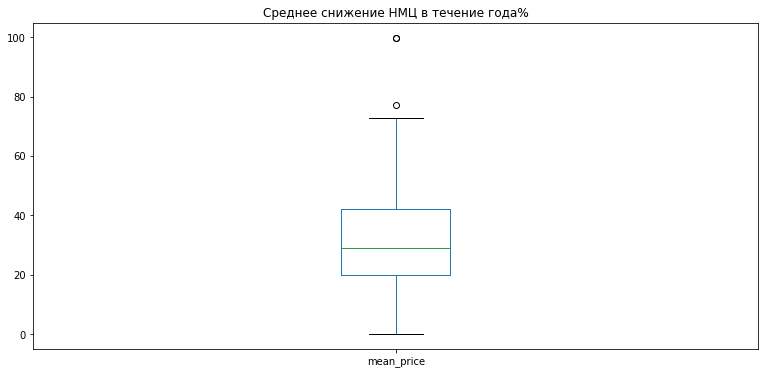

In [179]:
count_price.mean_price.plot(kind='box',
                   title='Среднее снижение НМЦ в течение года%')

In [ ]:
#Гипотезы/выводы:
# Среднее снижение НМЦ в течение года в пределах примерно 20-40%
# Чаще превалирует значительное снижение, чем небольшое (это говорит о тенденции к демпингу в отрасли)
# Очень мало, но есть выбросы где снижение более 70%